# import


In [ ]:
import numpy as np
import pandas as pd

import dataset from https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [ ]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head(10)
#iris.shape

#pd.set_option("display.max_rows", 100)
#pd.set_option("display.max_column", 100)
#print(iris.describe(include='all'))


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# visualize the attribute

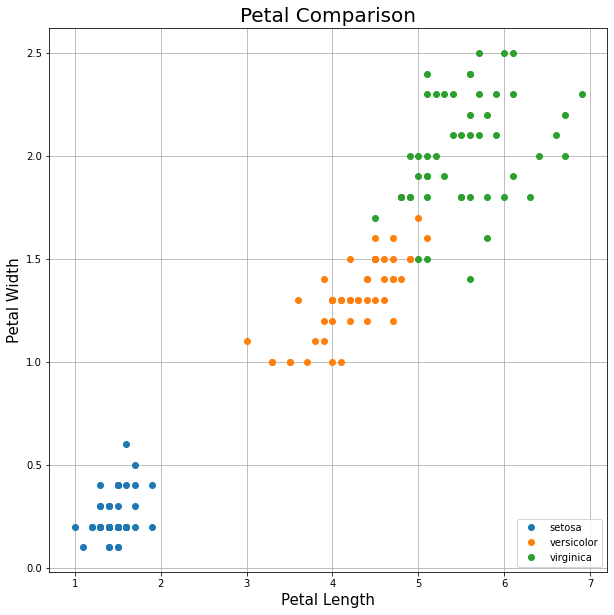

In [ ]:
import matplotlib.pyplot as plt

groups = iris.groupby("species")
for name, group in groups:
    plt.plot(group["petal_length"], group["petal_width"], marker="o", linestyle="", label=name)
plt.legend(loc = "lower right")
plt.grid()
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Petal Comparison", fontsize=20)
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)

plt.show()

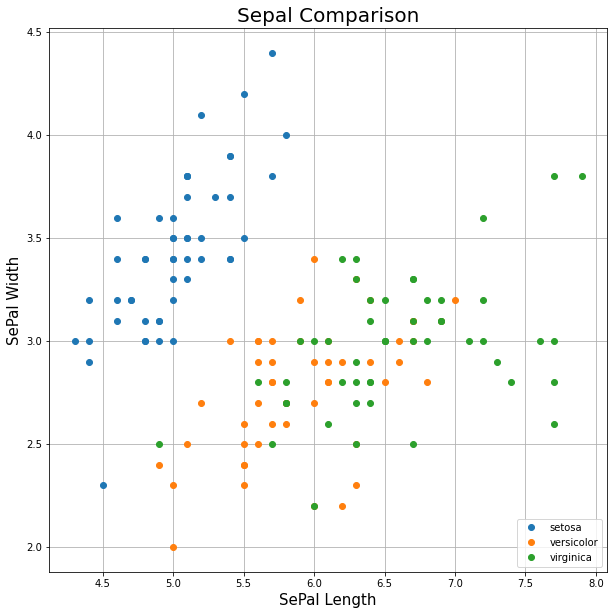

In [ ]:
import matplotlib.pyplot as plt

groups = iris.groupby("species")
for name, group in groups:
    plt.plot(group["sepal_length"], group["sepal_width"], marker="o", linestyle="", label=name)
plt.legend(loc = "lower right")
plt.grid()
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Sepal Comparison", fontsize=20)
plt.xlabel('SePal Length', fontsize=15)
plt.ylabel('SePal Width', fontsize=15)

plt.show()

# prepare data set

because we only use petal_length and petal_width, we only going to take third and fourth column and turn it into an array. and than we append it with w0 with values 1 to put in iris_1

[[1.4 0.2 1. ]
 [1.4 0.2 1. ]
 .
 .
 .
 [5.2 2.  1. ]
 [5.4 2.3 1. ]
 [5.1 1.8 1. ]]

in iris_y we make an array where setosa is 0 and everything else as 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

In [ ]:
iris_x = iris.iloc[:, 2:4].to_numpy()
shape = iris.shape
w0 =np.full((shape[0],1), [1])
iris_x = np.append(iris_x, w0, axis = 1)

iris_y = iris.iloc[:, 4].to_numpy()
iris_y = np.where(iris_y== "setosa", 0, 1 )

#print(iris_x)
print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


shuffling the data

In [ ]:
iris_y =  np.reshape (iris_y,(-1,1))

shuffling = np.append(iris_x, iris_y, axis = 1)
np.random.shuffle(shuffling)

iris_x = shuffling[:,:-1]
iris_y = shuffling[:,-1]

In [ ]:

Iters = 1000 # the maximum number of training epochs
no_of_inputs = 2 # x0 is appended for bias w0.
np.random.seed(654)
weights = np.random.randn(no_of_inputs + 1) # to initialize the initial weight coefficients at random
print("initial: " + str(weights)) # to print the initial weight coefficients: [w1, w2, w0]
learning_rate = 0.1 # to specify the learning rate

initial: [ 1.66201555 -1.08031903  1.21524534]


train the first perceptron

In [ ]:
correct = 0
for _ in range(Iters):
  for _input, label in zip(iris_x, iris_y):
    summation = np.dot(_input, weights) # to compute the weighted sum
    
    if summation >= 0: # to make a decision based on the step activation function
      predicted = 1
    else:
      predicted = 0
    
    if predicted == label:
      correct += 1

    weights += learning_rate * (label - predicted) * _input # to adjust weights!?
print("trained: ", str(weights)) # to print the trained weight coefficients
accuracy = (correct/Iters)/len(iris_x)
print("Accuracy ", str(accuracy) )

trained:  [ 0.64201555 -0.41031903 -1.18475466]
Accuracy  0.9997199999999999


In [ ]:

p1 = abs((weights[2]/weights[1]))
p2 = abs((weights[2]/weights[0]))
print("point 1 :", str(p1))
print("point 2: ", str(p2))

point 1 : 2.887398770535943
point 2:  1.8453675532029739


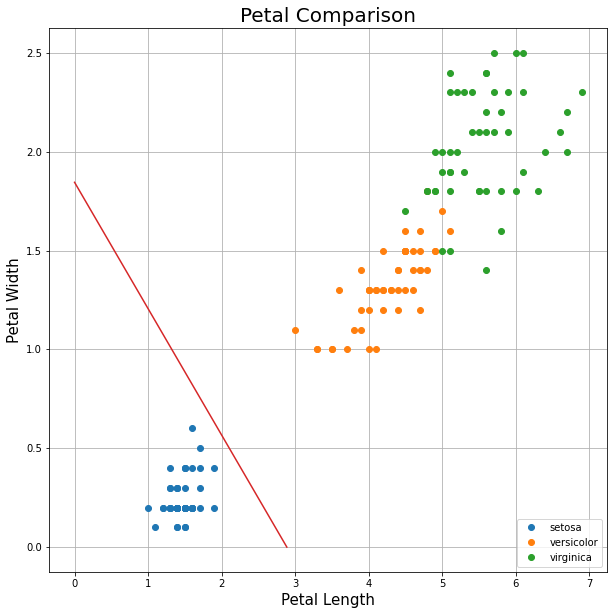

In [ ]:

groups = iris.groupby("species")
for name, group in groups:
    plt.plot(group["petal_length"], group["petal_width"], marker="o", linestyle="", label=name)
plt.legend(loc = "lower right")
plt.grid()
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Petal Comparison", fontsize=20)
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)
plt.plot([0,p1],[p2,0],)
plt.show()

# prepare data for second perceptron

In [ ]:
iris2 = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

#delete all setosa data point
indexsetosa = iris2[ iris2['species'] == "setosa" ].index
iris2.drop(indexsetosa, inplace=True)


#the rest same as before
iris_x2 = iris2.iloc[:, 2:4].to_numpy()
shape = iris2.shape
w0 =np.full((shape[0],1), [1])
iris_x2 = np.append(iris_x2, w0, axis = 1)

iris_y2 = iris2.iloc[:, 4].to_numpy()

iris_y2 = np.where(iris_y2== "virginica", 1, 0 )
iris_y2 =  np.reshape (iris_y2,(-1,1))
shuffling = np.append(iris_x2, iris_y2, axis = 1)
np.random.shuffle(shuffling)

iris_x2 = shuffling[:,:-1]
iris_y2 = shuffling[:,-1]
#print(iris_x2)
#print(iris_y2)


#train second perceptron

In [ ]:
Iters = 5000 # the maximum number of training epochs
no_of_inputs = 2 # x0 is appended for bias w0.
np.random.seed(1465)
weights2 = np.random.randn(no_of_inputs + 1) # to initialize the initial weight coefficients at random
print("initial: " + str(weights2)) # to print the initial weight coefficients: [w1, w2, w0]
learning_rate = 0.1 # to specify the learning rate
correct2 = 0
for _ in range(Iters):
  for _input, label in zip(iris_x2, iris_y2):
    summation = np.dot(_input, weights2) # to compute the weighted sum
    
    if summation >= 0: # to make a decision based on the step activation function
      predicted = 1
    else:
      predicted = 0
    
    if predicted == label:
      correct2 += 1

    weights2 += learning_rate * (label - predicted) * _input # to adjust weights!?
print("trained: ", str(weights2)) # to print the trained weight coefficients
accuracy2 = (correct2/Iters)/len(iris_x2)
print("Accuracy ", str(accuracy2) )

#92.4% is the best acuracy that i could get

initial: [-0.10701912 -0.01650817  0.58331321]
trained:  [  4.40298088   5.94349183 -31.91668679]
Accuracy  0.924298


In [ ]:
pp1 = abs((weights2[2]/weights2[1]))
pp2 = abs((weights2[2]/weights2[0]))
print("point 1 :", str(pp1))
print("point 2: ", str(pp2))

point 1 : 5.370022829784549
point 2:  7.248881531266166


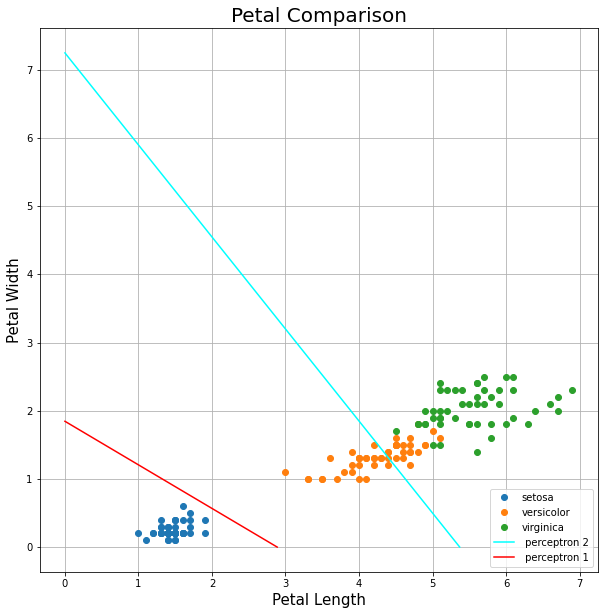

In [ ]:
groups = iris.groupby("species")
for name, group in groups:
    plt.plot(group["petal_length"], group["petal_width"], marker="o", linestyle="", label=name)
plt.grid()
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Petal Comparison", fontsize=20)
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)
plt.plot([0,pp1],[pp2,0], c = "cyan", label = " perceptron 2")
plt.plot([0,p1],[p2,0], c = "red",  label = " perceptron 1")
plt.legend(loc = "lower right")
plt.show()